# Workshop1:Power Laws and Graphs

We have talked about power laws and random networks. One of those power laws occurs regarding the  topology  of  natural  networks:  Most  nodes  have  few  connections,  and  few  nodes  have  most connections.  These  network structures  have  important  consequences  on  the  dynamics  of  the associated   system:   Transportation   networks,   communication   networks,   metabolic   networks, epidemiologic networks, social networks, etc. We are going to review some related concepts.

1. Reading assignment: Tight version: Albert-Laszlo Barabasi and Eric Bonabeau “Scale-free Networks”. Scientific American. May 2003 

2. Synthetic networks:Build  two  networks.Begin  with  two  connected  nodes  and,  at  each  time,  add another node and connect it randomly to one of the existing nodes. For the first network, choose uniformly among the existing nodes. For the second network, choose  according  to  the  current  number  of  links  of  each  existing  node.  After having 4039 nodes (and 4038 edges), complete 88234 edges choosing randomly two nodes to connect, according to the rules we have defined for each network. Compute the degree distribution of your two networks and compare them.

In [ ]:
import random
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Ignore matplotlib warnings
import warnings
# warnings.filterwarnings("ignore")

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
#First two nodes
G.add_edge(1, 2)

In [ ]:
#All nodes
for node in range(3, 4040):
  #Connect to a random node
  n1 = int(random.uniform(1, node-1))
  G.add_edge(n1, node)

In [ ]:
#Random
Gr = G.copy()

### Random

In [ ]:
edge = 1
new_edges = 88235 - 4038
cant_nodes = G.number_of_nodes()

In [ ]:
cant_nodes

4039

In [ ]:
while edge < new_edges:
  n1 = int(random.uniform(1, cant_nodes))
  n2 = int(random.uniform(1, cant_nodes))
  if (not(Gr.has_edge(n1, n2) or Gr.has_edge(n2, n1))) and (n1 != n2):
    Gr.add_edge(n1, n2)
    edge += 1

In [ ]:
Gr.number_of_edges() == 88234

True

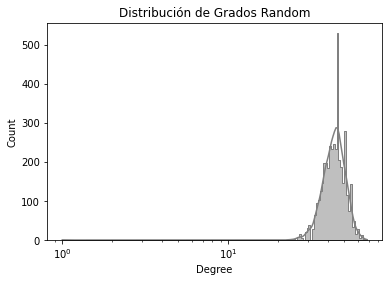

In [ ]:
#Calculo y grafico de grados
degrees_random = [Gr.degree(n) for n in Gr.nodes()]
ax = sns.histplot(degrees_random, kde=True, log_scale=True,element="step",color="gray")
ax.set(xlabel="Degree", ylabel='Count')
ax.set_title("Distribución de Grados Random")
plt.show() 

### Free Scale

In [ ]:
Gs = nx.Graph()
Gs.add_edge(1, 2)
#Arreglo de nodos
number=Gs.nodes
#Arreglo de enlaces
W=np.asarray((len(Gs.edges(1)),len(Gs.edges(2))))

In [ ]:
W

array([1, 1])

In [ ]:
#Probabilidades
W=W/(Gs.number_of_edges()*2)

In [ ]:
W

array([0.5, 0.5])

In [ ]:
ran=np.random.choice(number, 1, p=W)
ran

array([2])

In [ ]:
Gs.edges(1)

EdgeDataView([(1, 2)])

In [ ]:
#All nodes
for i in range(3,4040):
    # Aleatorios
    ran=np.random.choice(number, 1, p=W)
    # Se añade el enlace y se añade al arreglo
    Gs.add_edge(i, ran[0])
    number=Gs.nodes
    neW=0
    W=np.append(W, neW)
    #Se reconfiguran las probabilidades
    for j in range(0,len(W)):
        W[j]=len(Gs.edges(j+1))
    W=W/(Gs.number_of_edges()*2)

In [ ]:
edge = 1
new_edges = 88235 - 4038

In [ ]:
#aca se agregan los enlaces faltantes
while edge < new_edges:
  print(edge)
  #Se obtienen los nodos a partir de la probabilidad almacenada
  ran=np.random.choice(number,1,p=W)
  n1=ran[0]
  ran=np.random.choice(number,1,p=W)
  n2=ran[0]
  #Se confirma que los nodos no esten conectados entre ellos ni que sea el mismo nodo
  if (not(Gs.has_edge(n1, n2)) and not(Gs.has_edge(n2, n1))) and n1 != n2:
    print("node1: " + str(n1) +  " | node2: " + str(n2))
    Gs.add_edge(n1, n2)
    edge += 1
    #Se reconfiguran las probabilidades
    for j in range(0,len(W)):
        W[j]=len(Gs.edges(j+1))
    W=W/(Gs.number_of_edges()*2)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
81809
node1: 3967 | node2: 117
81810
node1: 3748 | node2: 41
81811
node1: 33 | node2: 16
81812
node1: 740 | node2: 1406
81813
node1: 341 | node2: 3453
81814
node1: 1965 | node2: 2983
81815
node1: 3968 | node2: 151
81816
node1: 701 | node2: 2498
81817
node1: 1345 | node2: 380
81818
node1: 591 | node2: 1516
81819
81819
node1: 2724 | node2: 892
81820
node1: 3070 | node2: 2
81821
node1: 610 | node2: 164
81822
node1: 676 | node2: 2527
81823
node1: 752 | node2: 87
81824
node1: 1662 | node2: 215
81825
node1: 564 | node2: 2771
81826
node1: 3394 | node2: 3537
81827
node1: 109 | node2: 722
81828
node1: 69 | node2: 786
81829
node1: 2593 | node2: 739
81830
node1: 44 | node2: 471
81831
node1: 694 | node2: 524
81832
node1: 1307 | node2: 213
81833
node1: 762 | node2: 1809
81834
node1: 2652 | node2: 213
81835
node1: 970 | node2: 780
81836
node1: 2395 | node2: 320
81837
node1: 2789 | node2: 2391
81838
81838
node1: 3038 | node2: 1702
818

In [ ]:
Gr.number_of_edges() == 88234

True

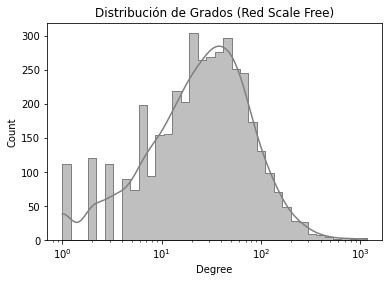

In [ ]:
#Se grafica la distribución de grados
degrees2 = [Gs.degree(n) for n in Gs.nodes()]
ax = sns.histplot(degrees2, kde=True, log_scale=True,element="step",color="gray")
ax.set(xlabel="Degree", ylabel='Count')
ax.set_title("Distribución de Grados (" + "Red Scale Free" + ")")
plt.show() 

3. Natural networks: You have a file with the Facebooklinks among 4039 students of some University Department.  Compute  the  degree  distribution  of  this  social  network  and compare with the two synthetic networks you obtained before.

In [ ]:
df = pd.read_csv("/content/Workshop 1_facebookNetwork.txt", sep=" ") #Se modifico el txt para colocarle un encabezado con NodeA, NodeB
df.head()

,NodeA,NodeB
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [ ]:
#Se genera el grafo
Gf = nx.from_pandas_edgelist(df,source='NodeA', target='NodeB') 

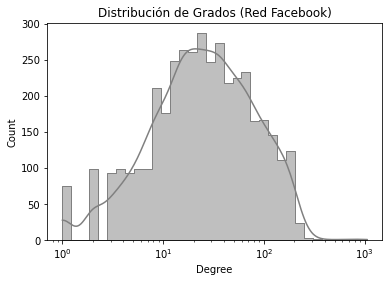

In [ ]:
#Calculo y grafico de grados
degrees3 = [Gf.degree(n) for n in Gf.nodes()]
ax = sns.histplot(degrees3, kde=True, log_scale=True,element="step",color="gray")
ax.set(xlabel="Degree", ylabel='Count')
ax.set_title("Distribución de Grados (" + "Red Facebook" + ")")
plt.show() 

In [ ]:
#numero de enlaces y nodos
Gf.number_of_edges(),Gf.number_of_nodes()

(88234, 4039)

## Comparación redes

In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

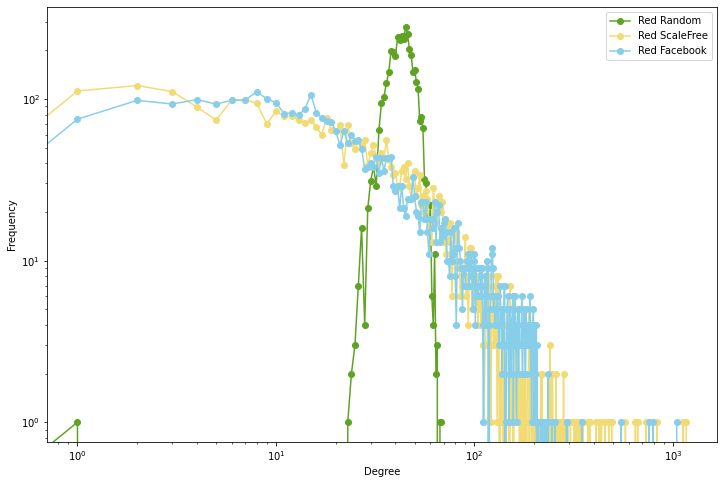

In [ ]:
Random = degree_histogram_directed(Gr)
ScaleFree = degree_histogram_directed(Gs)
fb = degree_histogram_directed(Gf)
degrees = range(len(ScaleFree))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(Random)), Random, 'o-',color="#5FA324", label='Red Random')
plt.loglog(range(len(ScaleFree)), ScaleFree, 'o-',color="#F2DB74", label='Red ScaleFree')
plt.loglog(range(len(fb)), fb, 'o-',color="skyblue", label='Red Facebook')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')